<a href="https://colab.research.google.com/github/raviatkumar/Hotel-Booking-Analysis-EDA/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**

#**This dataset contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

#**Explore and analyze the data to discover important factors that govern the bookings.**

#**Data Description**

**The file contains different attributes of hotel booking details. The detailes of data  is given below:**

**hotel: Name of hotel ( City or Resort)**

**is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)**

**lead_time: time (in days) between booking transaction and actual arrival.**

**id: unique identifier of each booking**

**no_of_babies: Number of babies**
  
**no_of_adults: Number of adults**

**no_of_children: Number of Children**

**no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest** 

**stayed or booked to stay at the hotel**

**no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel**

**type_of_meal_plan: Type of meal plan booked by the customer**

**required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)**

**room_type_reserved: Type of room reserved by the customer.**

**arrival_year: Year of arrival date**

**arrival_month: Month of arrival date**

**arrival_date: Date of the month**

**arrival_date_day_of_month: Day of month of arrival date**

**country: Country of origin of customers (as mentioned by them)**

**company: Id of the company making a booking**

**days_in_waiting_list: No. of days on waiting list.**

**customer_type: Type of customer(Transient, Group, etc.)**

**market_segment_type: Market segment designation.**

**repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)**

**no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking**

**no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking**

**avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)**

**no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)**

**reservation_status: Whether a customer has checked out or canceled,or not showed**

**reservation_status_date: Reservation Status date**

#**Import packages**

In [67]:
#import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

**Load the dataset and print the shape of the dataset**

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df=pd.read_csv('/content/drive/MyDrive/proj/Hotel_Bookings.csv')

In [70]:
print(f'The shape of the dataset is {df.shape[0]} rows and {df.shape[1]} columns')

The shape of the dataset is 119390 rows and 32 columns


**Print the first and last 3 rows of columns**

In [71]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [72]:
df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


**Check the column datatypes**

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Understanding statistical data summaries**

In [74]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


**Identifying and printing duplicate values**

In [75]:
print(f"No. of duplicate rows: {df[df.duplicated()].shape[0]}")

No. of duplicate rows: 31994


In [76]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)
duplicate_missing_data_perc = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
duplicate_missing_data_perc.columns = ['No. of Missing Data', '% Missing Data']
duplicate_missing_data_perc

,No. of Missing Data,% Missing Data
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


In [77]:
# Columns having missing values.
missing_value=df.isnull().sum().sort_values(ascending = False)
print(missing_value[:4])

company     82137
agent       12193
country       452
children        4
dtype: int64


*   Company column has more missing values followed by agent,country,children

**Handling missing values**

In [78]:
df[['company','agent']] = df[['company','agent']].fillna(0)
df['children'].fillna(df['children'].mean(), inplace = True)
df['country'].fillna('others', inplace = True)

In [79]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**Converting columns to appropriate datatypes.**

In [80]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [81]:
# changing datatype of column 'reservation_status_date' to data_type.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

In [82]:
# Adding total stay hotel days in hotels
df['total_stays_hotel'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people as column, i.e. total people =  adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

*   We are adding this column so that we can analyse the stay length at hotels.

In [83]:
#Removing rows where total is 0.
df.drop(df[df.adults + df.babies + df.children == 0].index, inplace = True)  

#**Correlation Analysis:**

In [84]:
numeric = df[['previous_cancellations','previous_bookings_not_canceled','lead_time','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_stays_hotel','total_people','total_of_special_requests']]

<AxesSubplot:>

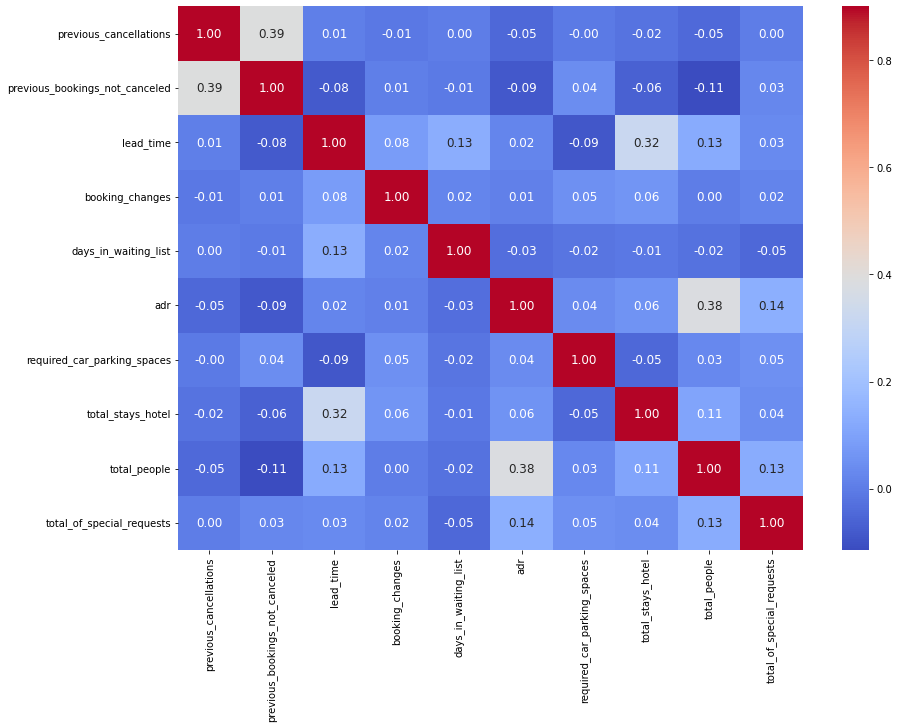

In [85]:
co_relation_matrix = numeric.corr()
f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(co_relation_matrix, fmt='.2f',cmap='coolwarm',annot = True, annot_kws={'size': 12},  vmax = .9 )

<AxesSubplot:>

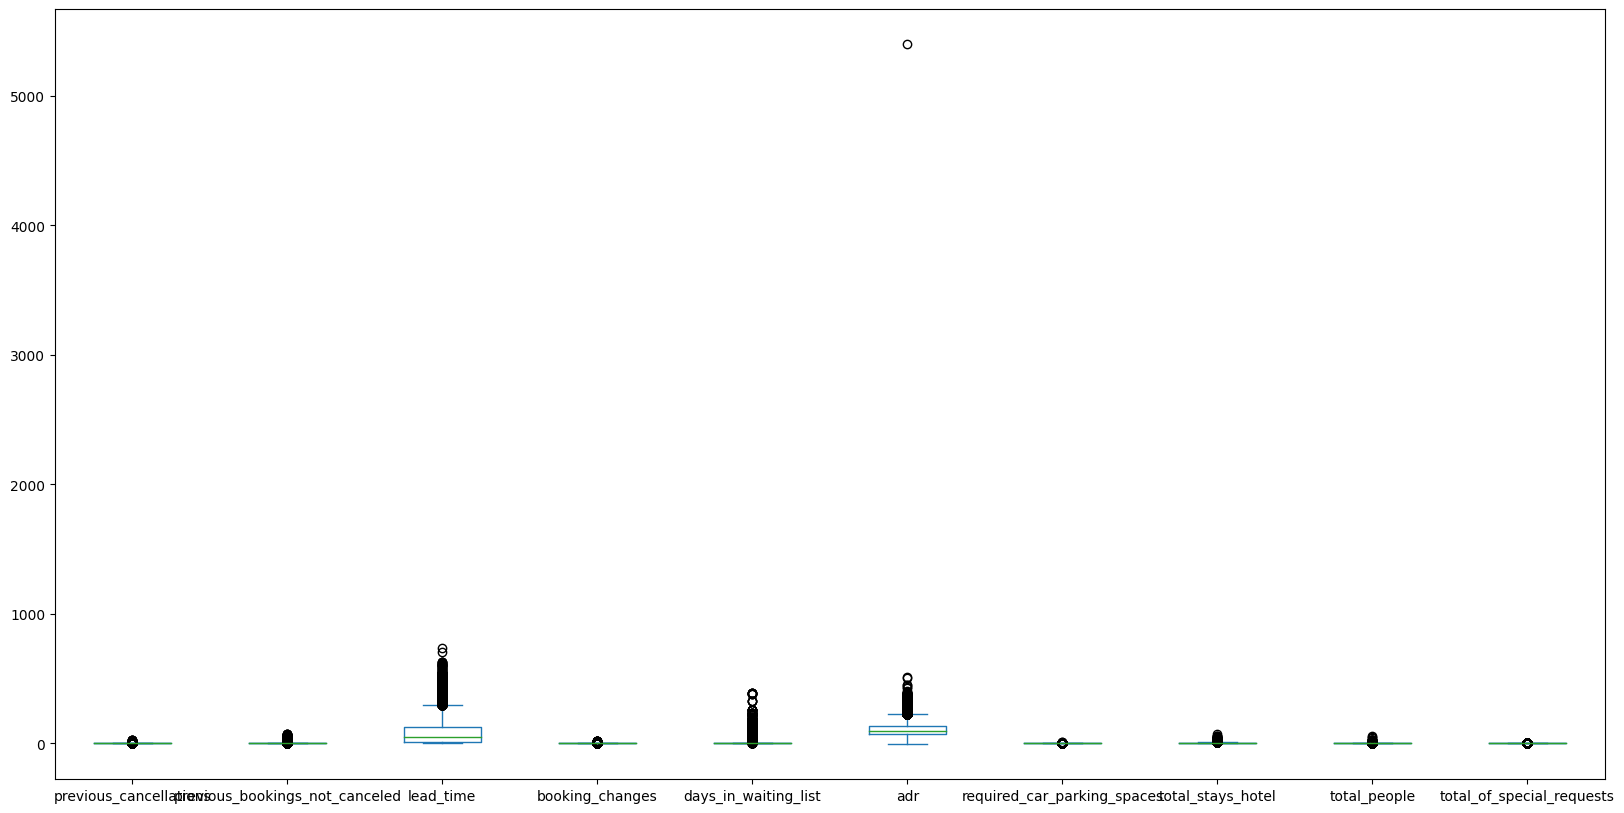

In [86]:
#identifing the outliners 
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
numeric.plot(kind = 'box')

*   As we have found the outlier in adr above value greater than 5000 that needed to be removed.

In [87]:
# Removing the outlier from dataset
df.drop(df[df['adr'] > 5000].index, inplace = True)

#**Hypothesis Generation:**

#Here are some of the hypothesis which could influence the Hotel Booking Analysis:

The best time to book a hotel room can be major holiday when management is not working.

#When is the best time for booking a hotel?

**Stays_in_week_nights**:how many weeknights (Monday through Friday) the visitor stayed in the hotel?

**Stays_in_weekend_nights**:What is the number of weekends (Saturday or Sunday) that the visitor stays.

**Arrival date month**:Which month do more hotel reservations come from customers?

**Arrival date year**:Which year had the most bookings?


Friday, Saturday, and Sunday are often the best days to make a hotel booking.


#When is the peak seasons to hotel industry ?

**Arrival date year**:The months of November through March are often off-peak for hoteliers. The summer season, when attendance is at its peak, runs from June through the end of August.


#Who are the target audience who book a hotel?

**No_of_babies**:What is the number of infants that stayed at the hotel?

**No_of_adults**:What is the number of infants that stayed at the hotel?

**No_of_children**:What is the number of childrens that stayed at the hotel?


Babies, kids, and adults stay at this hotel during major holidays (vacations)


**Customer_type**:Travelers on business, tourists, attendees at small conferences, etc.


Business travellers, tour groups, small conference groups, and individual tourists,Vacationers, business travellers, employees, and event planners are some examples of the target clients.


#How hotels generate revenue?

**Meal**:what type of meals do people have for breakfast,lunch and dinner?

**Adr**:What is the hotel's average daily rate?

**Days_in_waiting_list**:Days on waiting list indicate how many additional reservations the hotel has received?

**Is_repeated_guest**:How likely is it that a consumer will return? When the client returns, he would have loved the hotel's amenities and parks.

**Market_segment**:what platform the customer used to make the hotel reservation. They have either been used offline, online, by an agency, etc.

#**Hotel**

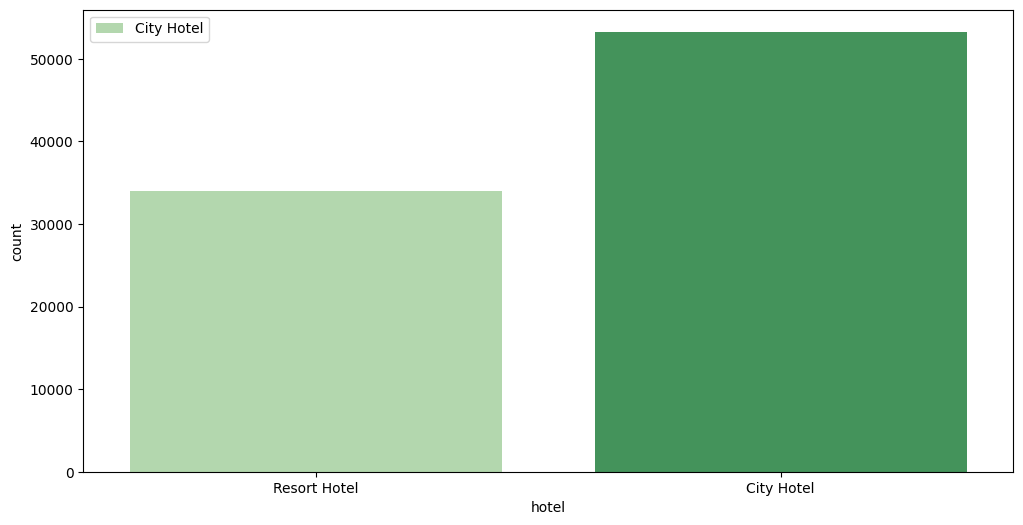

In [88]:
#Hotel
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='hotel', palette='Greens')
plt.legend(['City Hotel', 'Resort Hotel'])

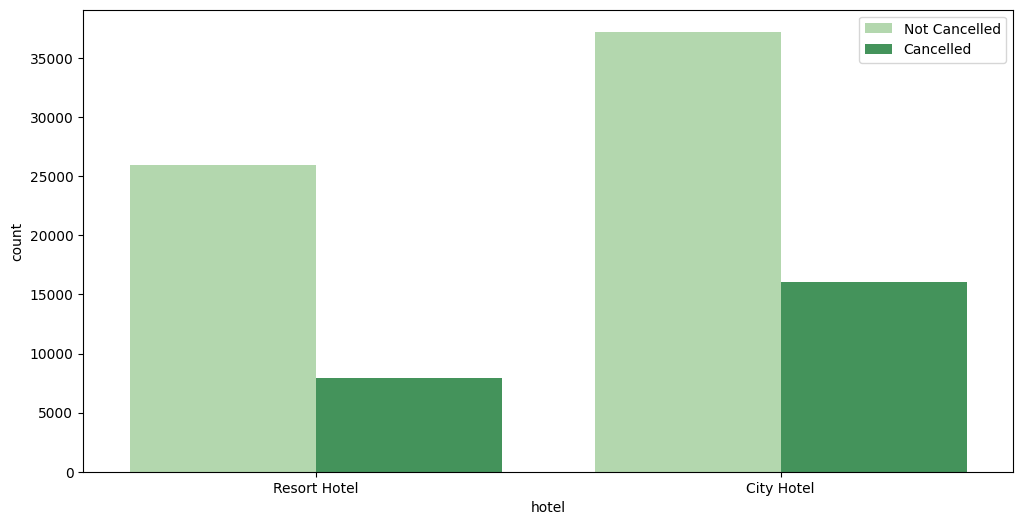

In [89]:
#Hotel cancellations
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='hotel',hue='is_canceled', palette='Greens',)
plt.legend(['Not Cancelled', 'Cancelled'])

*    Often times, people come from all over the world to stay at a hotel so that they can tour around the place that they are staying. They do not spend their day in the hotel and they only come back to sleep and shower, maybe a meal or two. In general, hotels despite having the amenities and luxuries similar to these of resorts are more a place to stay and not a destination.
*    Oftentimes, resorts are located in scenic areas but not near a city or anything really. People visit a resort to get away from other people and cities. They stay in the resort and probably don’t travel around as they may do when staying at a city hotel. A resort is the destination.
*   City hotel has 53000 bookings and Resort hotel has 33000 bookings.
*   A city hotel is the best as more customer book and stay at this hotel than compare to resort hotels.
*   More cancellations in city hotels than at resort hotels

City hotels receive more reservations since they are not considered destinations and are chosen by travellers as a location to spend the night rather than resort hotels, which are seen as a point of distinction and where guests stay for extended periods of time.

#**Arrival date year**


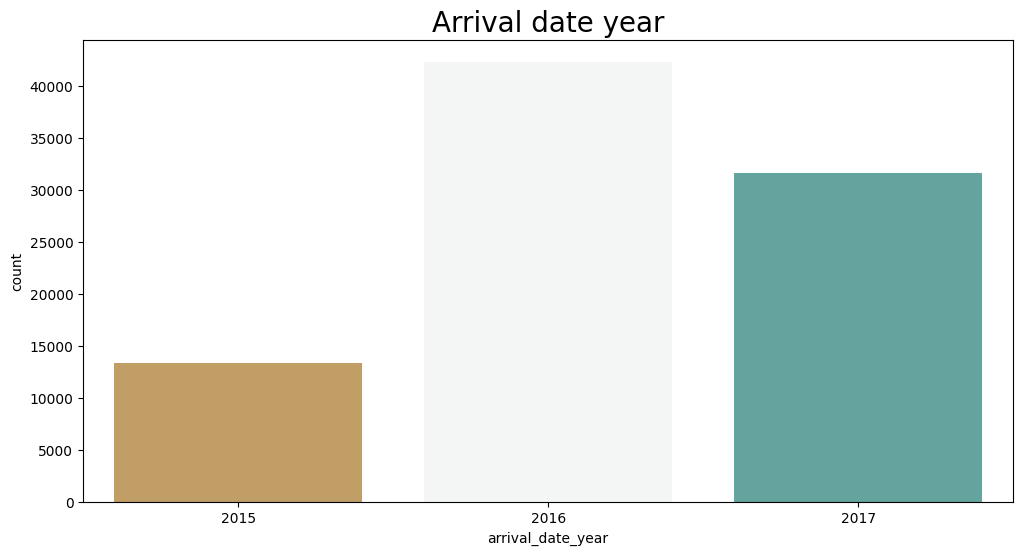

In [90]:
#Arrival date year
plt.figure(figsize=(12,6))
sns.countplot(df['arrival_date_year'], palette='BrBG')
plt.title("Arrival date year", fontsize = 20)
plt.show()

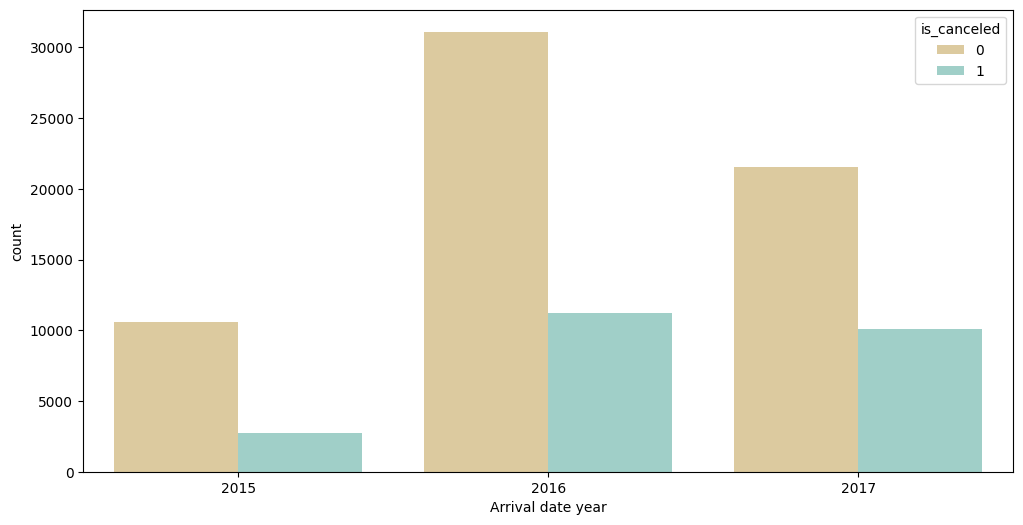

In [91]:
#arrival date year cancellations
plt.figure(figsize=(12,6))
sns.countplot(x = 'arrival_date_year', hue='is_canceled',palette='BrBG',data=df)
plt.xlabel("Arrival date year")
plt.show()

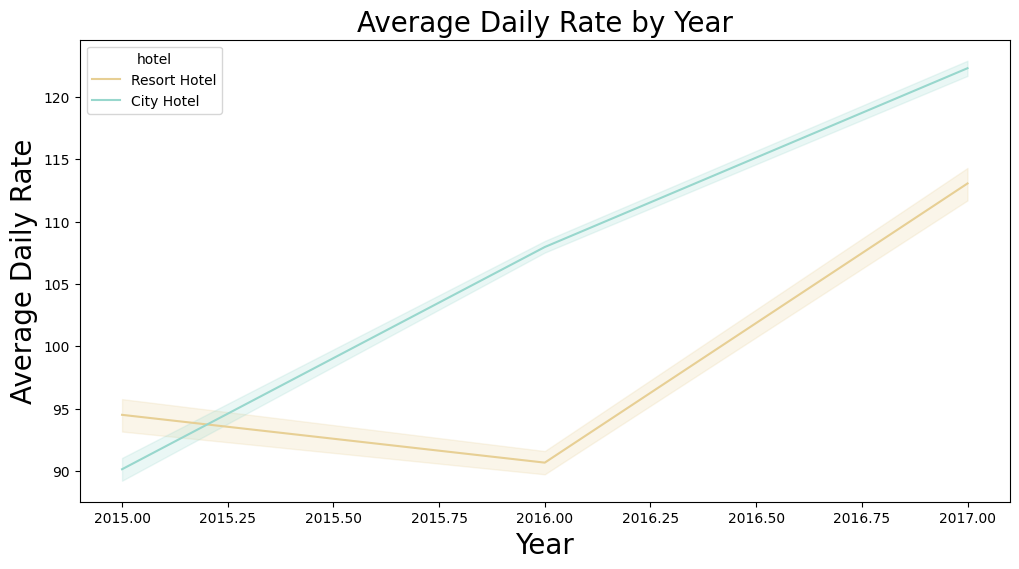

In [92]:
#Average Daily Rate by Year
plt.figure(figsize = (12,6))
ax = sns.lineplot(x = 'arrival_date_year', y = 'adr' ,hue='hotel',palette='BrBG',data=df)
ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('Average Daily Rate', fontsize = 20)
ax.set_title('Average Daily Rate by Year', fontsize = 20)
plt.show()

*   In 2016, there were more guests booking hotels followed by 2017 and 2015.
*   More cancellations of hotels in the year 2016 than compare to other years.
*   Year over year,average daily rate of hotels is increasing which means as the business grows, average daily price increases


#**Arrival date month**

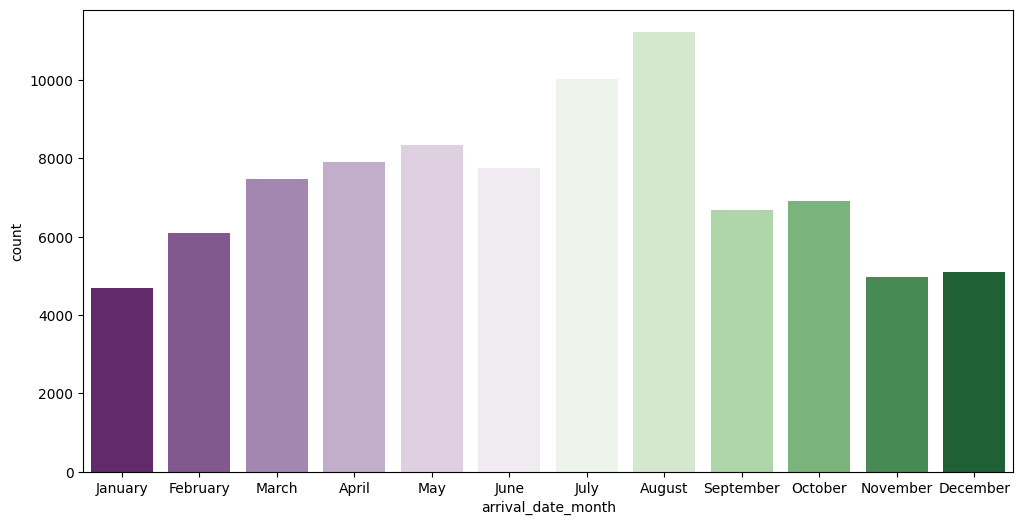

In [93]:
#arrival date month
plt.figure(figsize=(12,6))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.countplot(df['arrival_date_month'], palette='PRGn',order=months)
plt.show()

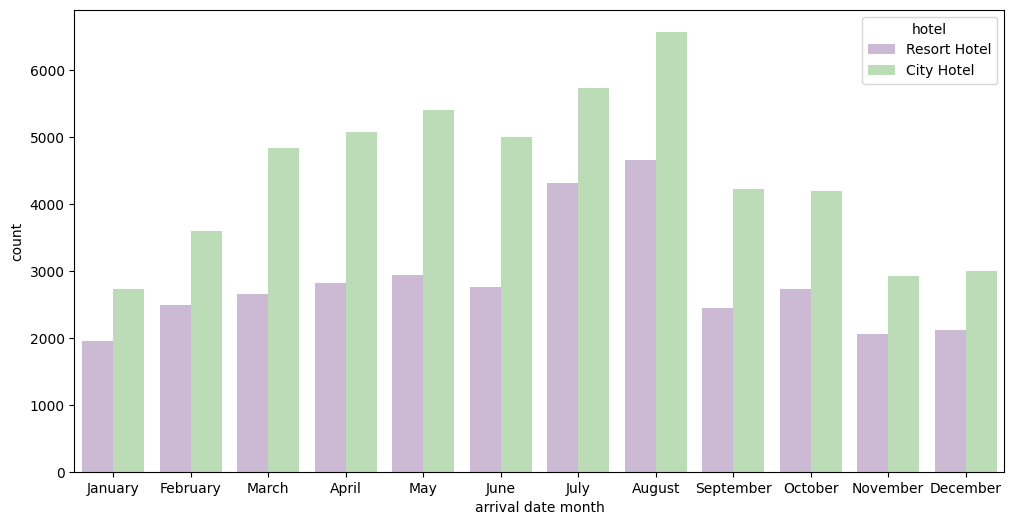

In [94]:
#arrival date month in hotel
plt.figure(figsize=(12,6))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.countplot(x='arrival_date_month',hue='hotel',palette='PRGn',order=months,data=df)
plt.xlabel("arrival date month")
plt.show()

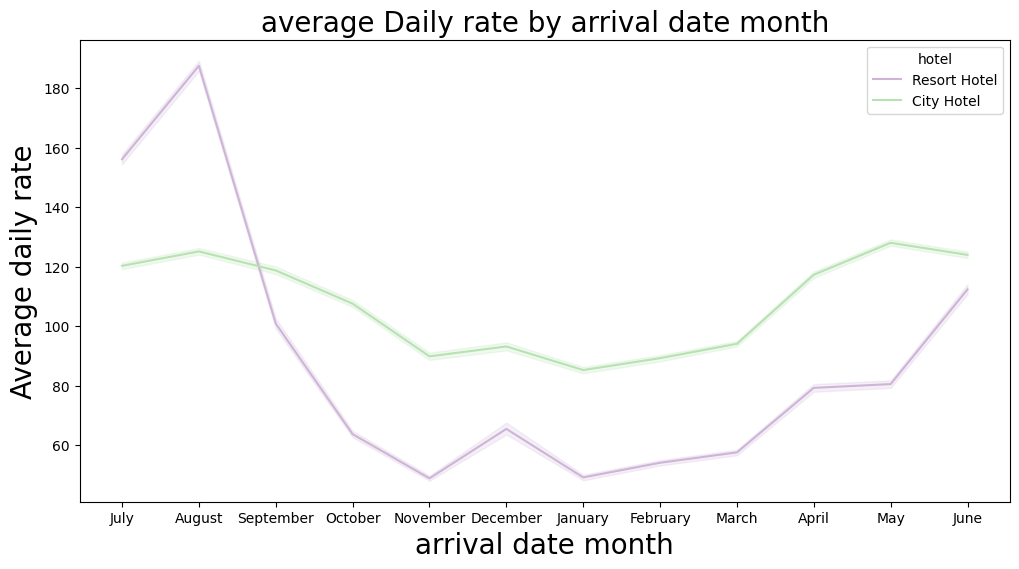

In [95]:
#Average Daily rate by arrival date month
plt.figure(figsize = (12,6))
ax = sns.lineplot(x = 'arrival_date_month', y = 'adr' ,hue='hotel',palette='PRGn',data=df)
ax.set_xlabel('arrival date month', fontsize = 20)
ax.set_ylabel('Average daily rate', fontsize = 20)
ax.set_title('average Daily rate by arrival date month', fontsize = 20)
plt.show()

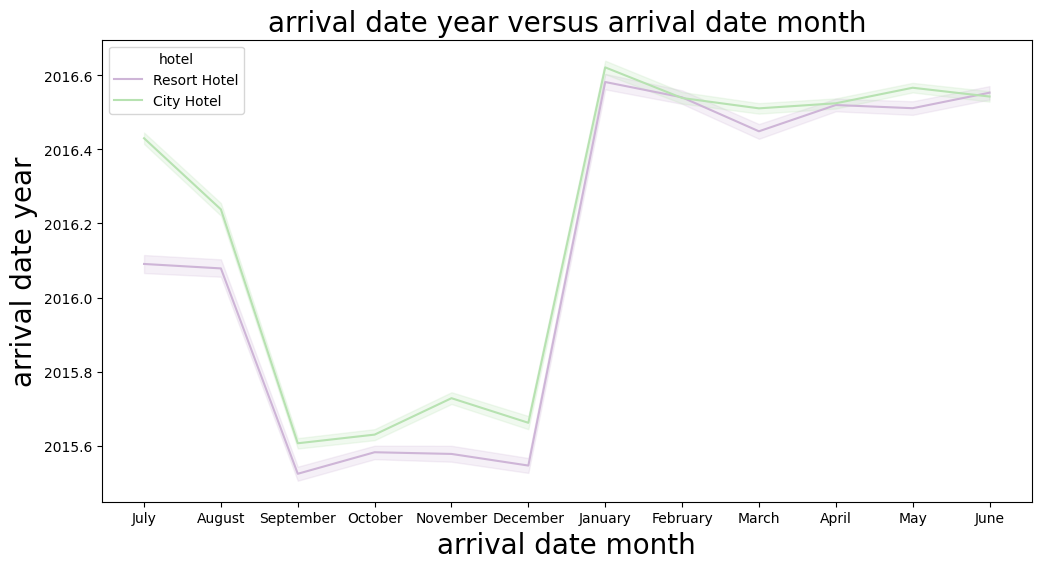

In [96]:
#arrival date year versus arrival date month
plt.figure(figsize = (12,6))
ax = sns.lineplot(x = 'arrival_date_month', y = 'arrival_date_year' ,hue='hotel',palette='PRGn',data=df)
ax.set_xlabel('arrival date month', fontsize = 20)
ax.set_ylabel('arrival date year', fontsize = 20)
ax.set_title('arrival date year versus arrival date month', fontsize = 20)
plt.show()

*   The peak booking period is from the month of may to august, when guests are arriving at hotels. The fewest bookings are made during the months of November through February, when most guests arriving into hotels.
*   August month is the peak period, where more guest are arriving at city hotel than compare to resort hotel.
*  August saw the highest number of average daily rate bookings for resort hotels, while  november and january month saw the lowest numbers.

Compared to other times of year, summer is the busiest season for hotels, when the majority of guests stay there.

#**Total nights**


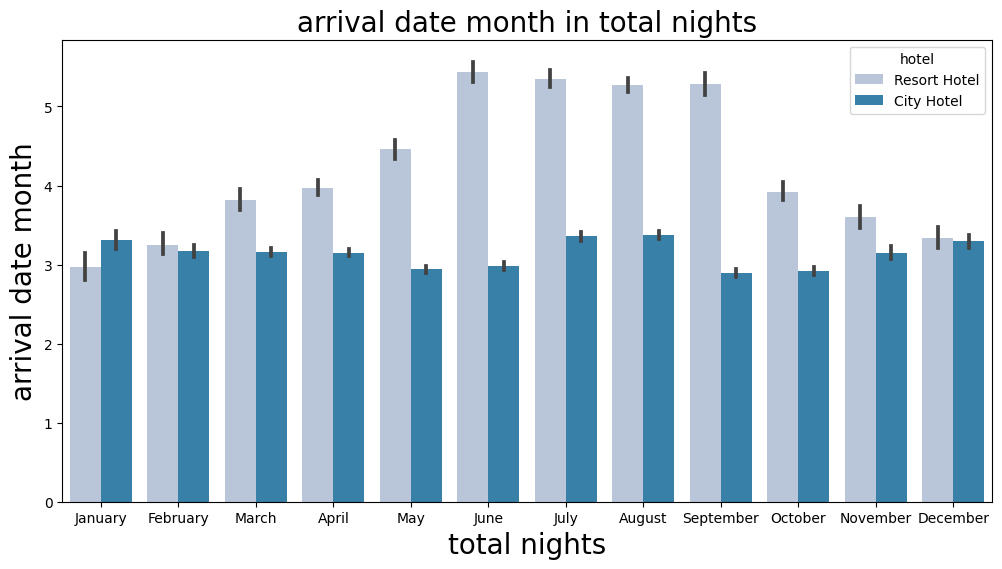

In [97]:
#stays in weekend night by month
plt.figure(figsize = (12,6))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax = sns.barplot(x = 'arrival_date_month', y = 'total_stays_hotel',hue='hotel',palette='PuBu',order=months,data=df)
ax.set_xlabel('total nights', fontsize = 20)
ax.set_ylabel('arrival date month', fontsize = 20)
ax.set_title('arrival date month in total nights', fontsize = 20)
plt.show()

*   Total nights stays are high from June to September at resort hotels.

#**Total Stays Hotel**

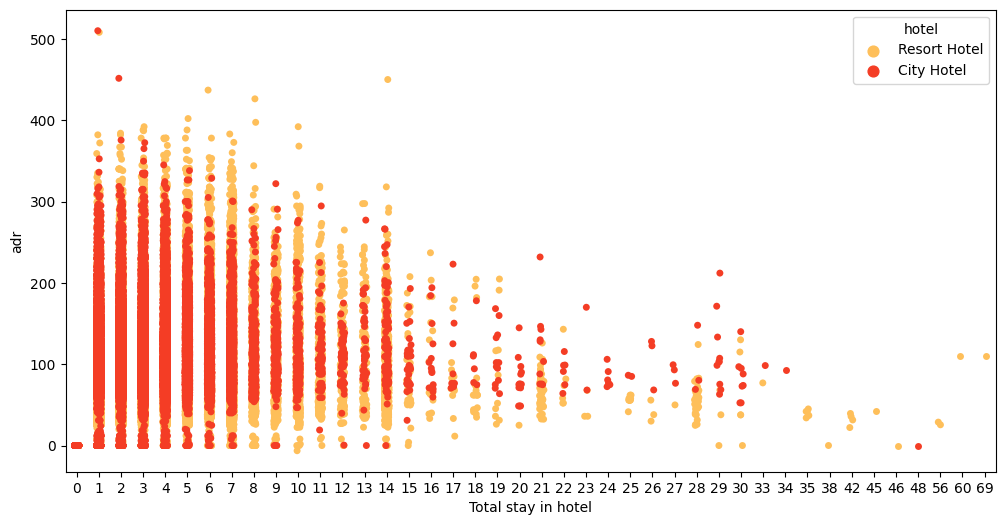

In [98]:
plt.figure(figsize = (12,6))
sns.stripplot(y = 'adr', x = 'total_stays_hotel',hue='hotel',palette='YlOrRd', data = df)
plt.xlabel("Total stay in hotel")
plt.show()

*   We can observe from the figure that the average daily rate lowers as the total length of stay increases. This indicates that a better price for the consumer can be reached for a longer stay.

#**Booking type by country**

Text(0.5, 1.0, 'Book Hotel type by country')

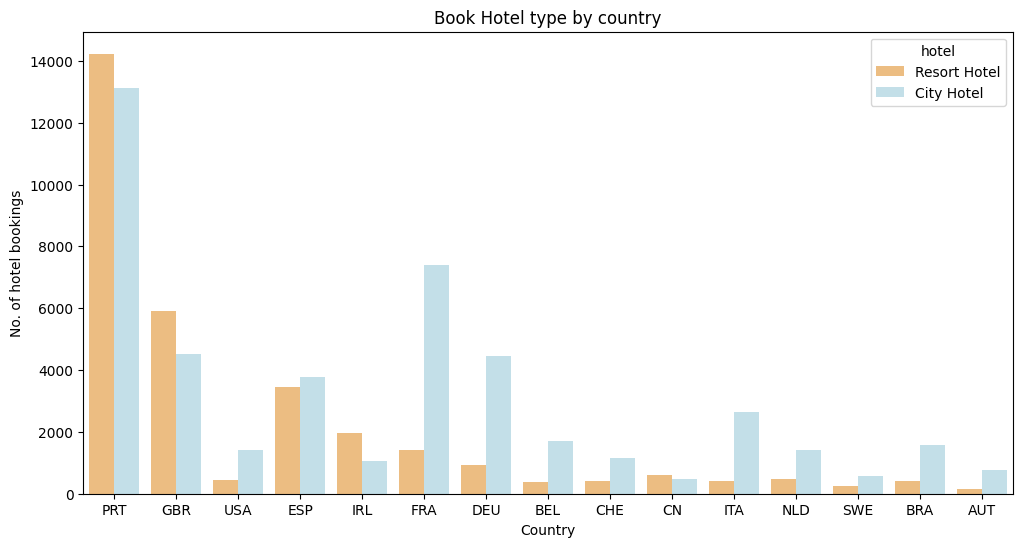

In [99]:
d = df['country'].value_counts().sort_values(ascending=False)[:15]
plt.figure(figsize=(12,6))
sns.countplot(x='country', hue='hotel',palette='RdYlBu', data=df[df['country'].isin(d.index)])
plt.xlabel("Country")
plt.ylabel("No. of hotel bookings")
plt.title("Book Hotel type by country")

*   The majority of reservations are made by PRT country, customer from the GBR country, the second-highest bookings for hotels.

Western Europe, specifically Portugal, France, Great Britain, and Spain, has more visitors than any other region.

#**Meal Type**

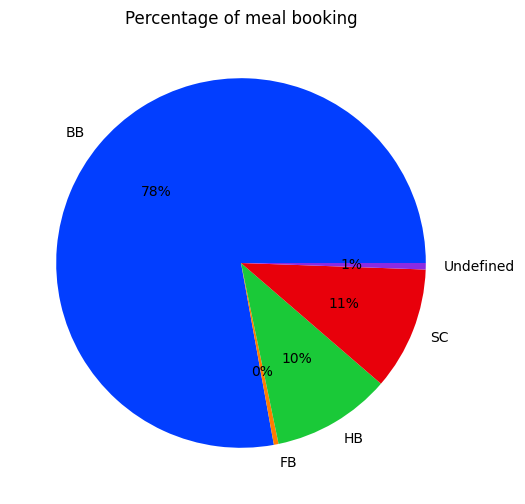

In [100]:
df_pie = df.groupby(['meal']).agg({'hotel':'count'}).reset_index()
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize=(12,6))
plt.pie(df_pie['hotel'], labels = df_pie.meal , colors = colors, autopct='%.0f%%')
plt.title('Percentage of meal booking')
plt.show()

*   The most popular meal is BB (Bed & Breakfast), which accounts for about 77.2% of all orders, followed by HB (Half Board), SC (no meal package), Undefined, and FB (Full Board).

Many people had bed and breakfast as they stayed in hotel at night which means more bookings are from city hotels.

#**Market Segment**


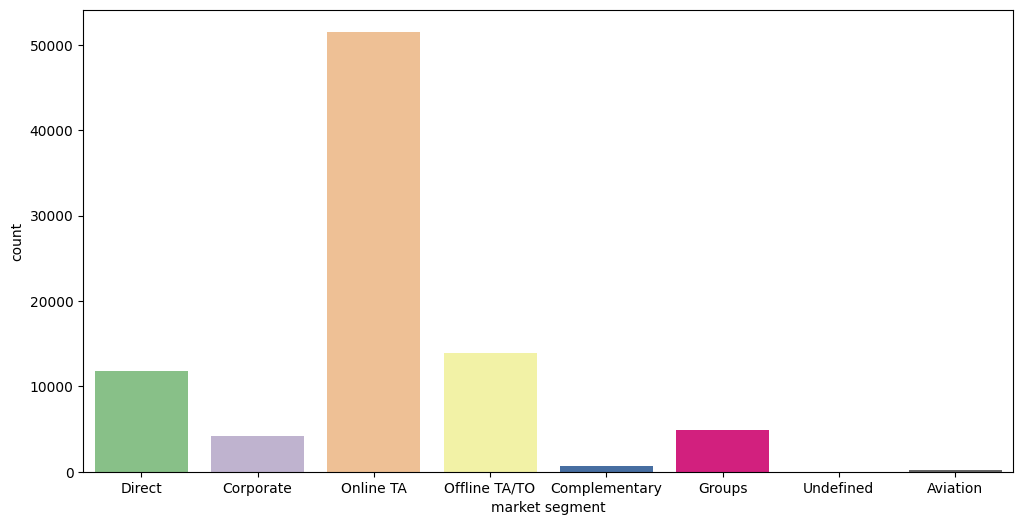

In [101]:
#Market segment
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'market_segment',palette='Accent',data=df)
ax.set_xlabel('market segment')
plt.show()

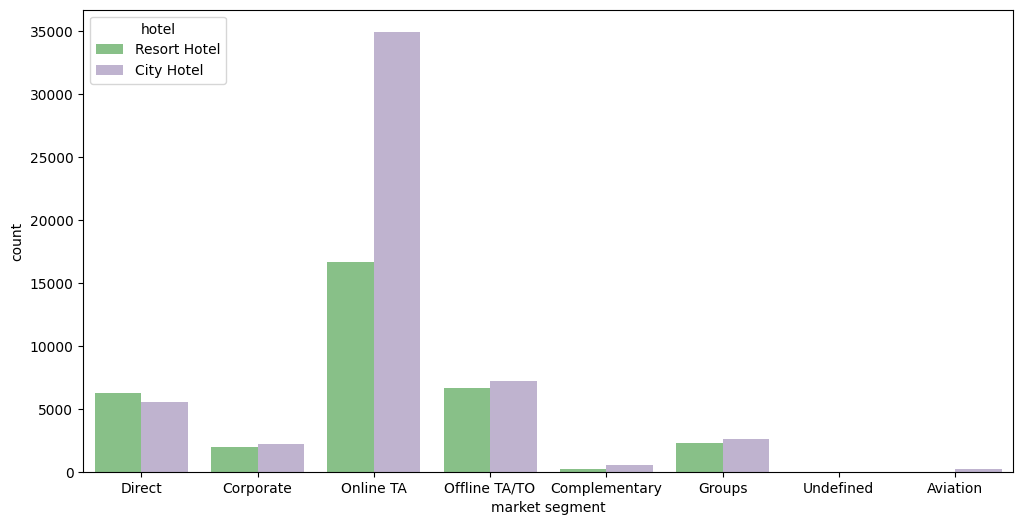

In [102]:
#Market segment in hotel
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'market_segment',hue='hotel',palette='Accent',data=df)
ax.set_xlabel('market segment')
plt.show()

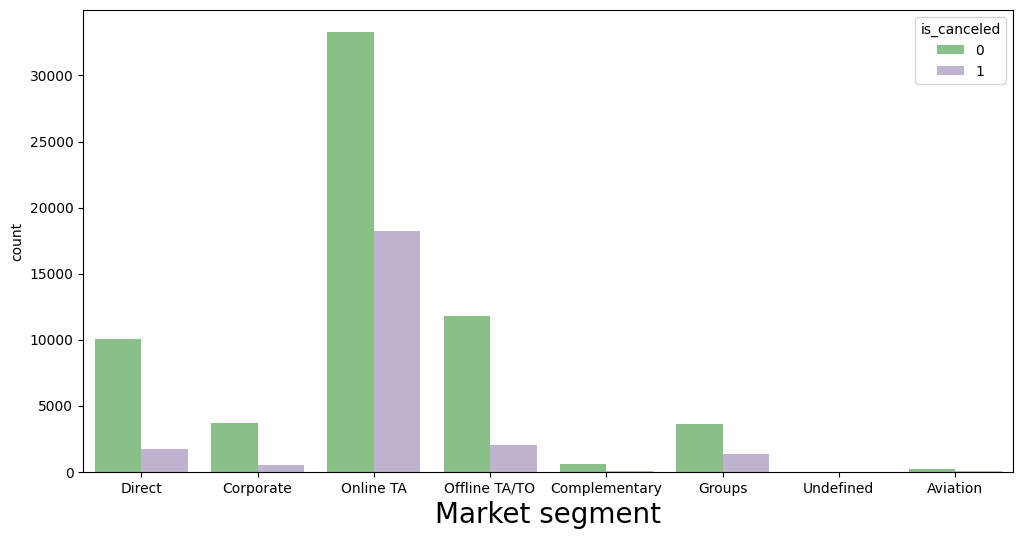

In [103]:
#Market segment by cancellations
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'market_segment', hue='is_canceled' ,palette='Accent',data=df)
ax.set_xlabel('Market segment', fontsize = 20)
plt.show()

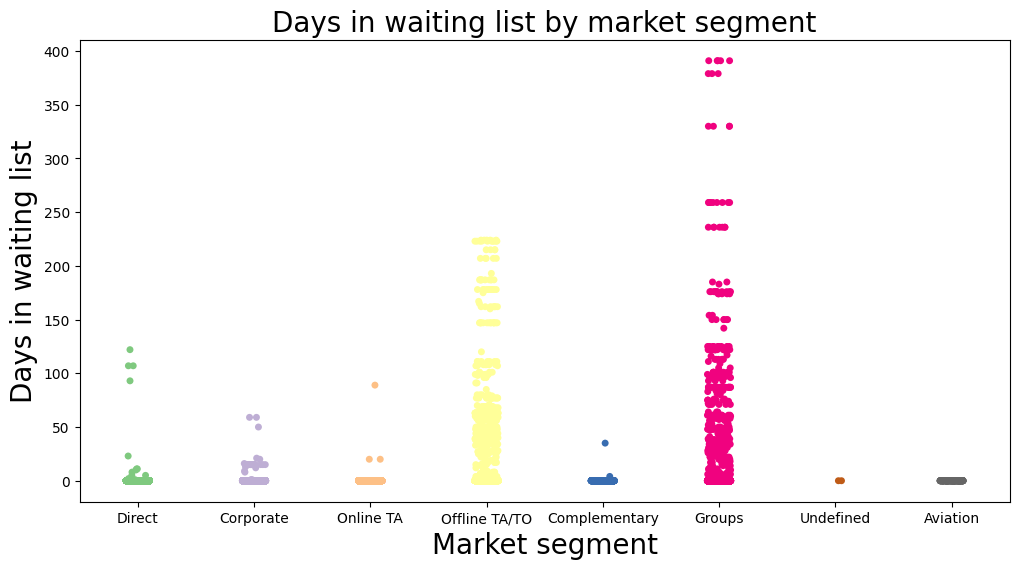

In [104]:
#days in waiting list by market segment
plt.figure(figsize = (12,6))
ax = sns.stripplot(x = 'market_segment', y = 'days_in_waiting_list',palette='Accent',data=df)
ax.set_xlabel('Market segment', fontsize = 20)
ax.set_ylabel('Days in waiting list', fontsize = 20)
ax.set_title('Days in waiting list by market segment', fontsize = 20)
plt.show()

*   Online TA has the most bookings overall and the lowest is complementary ones in the market segment.
*   Many people booked hotels through online TA in the market segment.
*   A hotel experiences a high rate of cancellations on online TA in market segment.
*   The shortest waiting list period is for aviation.


#**Deposit Type**

In [105]:
df['deposit_type'].value_counts()

No Deposit    86085
Non Refund     1037
Refundable      107
Name: deposit_type, dtype: int64

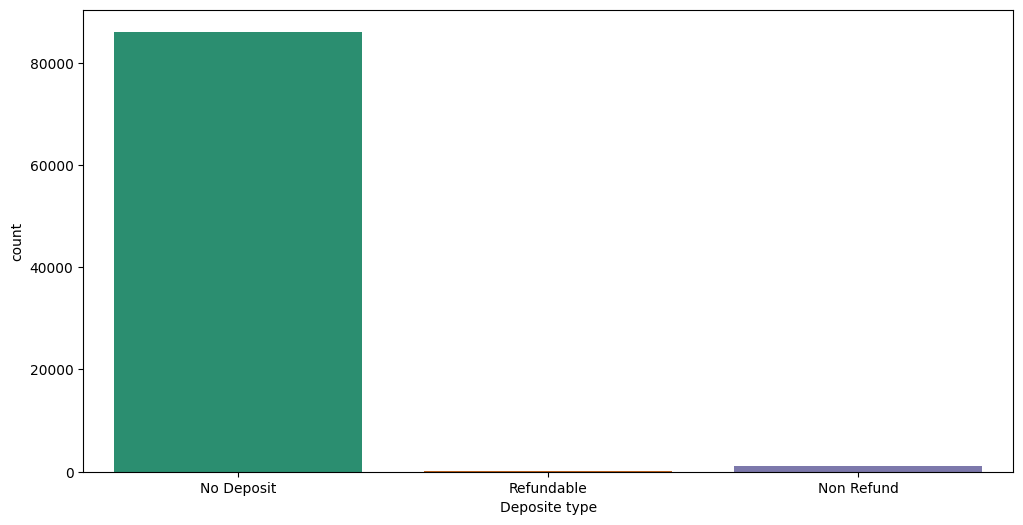

In [106]:
#Deposite type
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'deposit_type',palette='Dark2',data=df)
ax.set_xlabel('Deposite type')
plt.show()

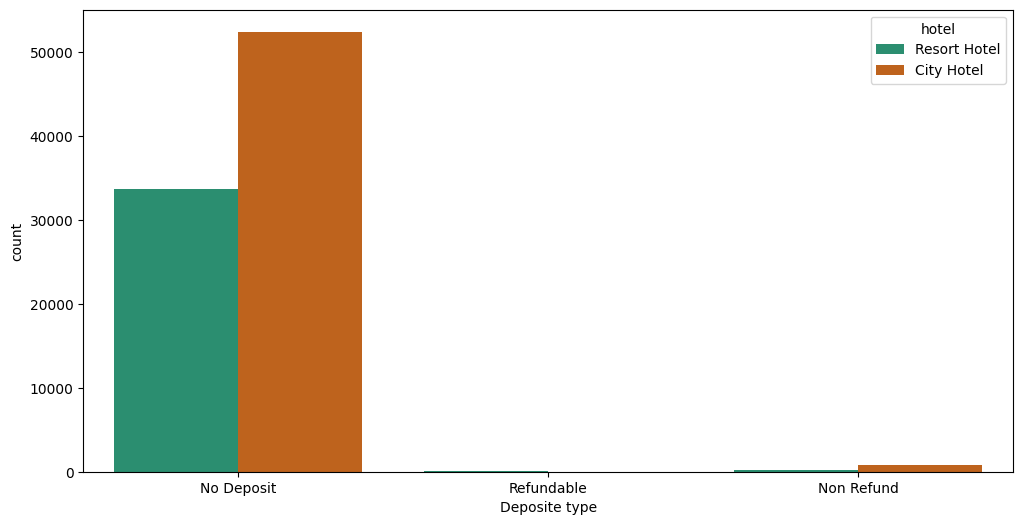

In [107]:
#Deposite type in hotel
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'deposit_type',hue='hotel' ,palette='Dark2',data=df)
ax.set_xlabel('Deposite type')
plt.show()

*   The majority of hotels accept no deposits (104641), followed by refundable type(14587) and non-refundable type (162).

*   City hotels has high number of no deposit type


#**Distribution Channel**

In [108]:
df['distribution_channel'].value_counts()

TA/TO        69027
Direct       12954
Corporate     5062
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

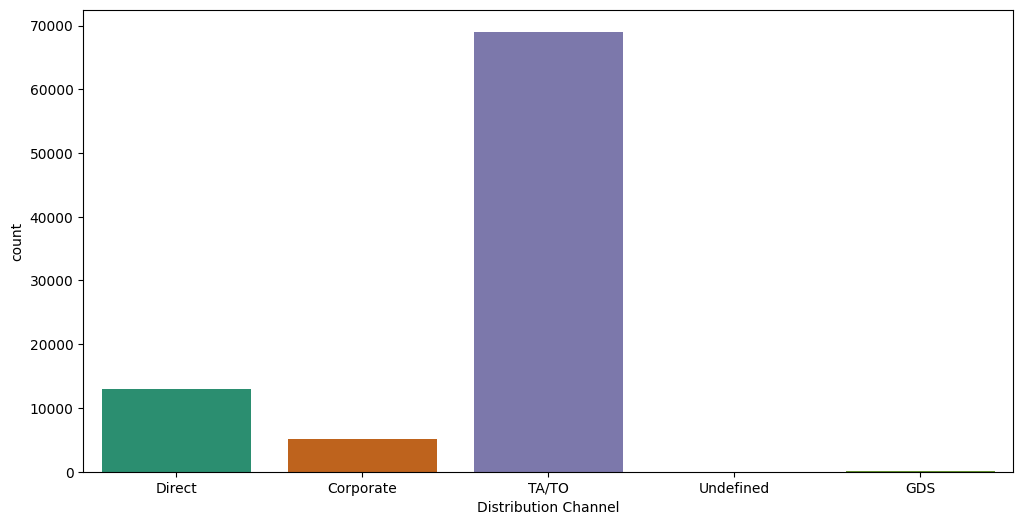

In [109]:
#Deposite type
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'distribution_channel',palette='Dark2',data=df)
ax.set_xlabel('Distribution Channel')
plt.show()

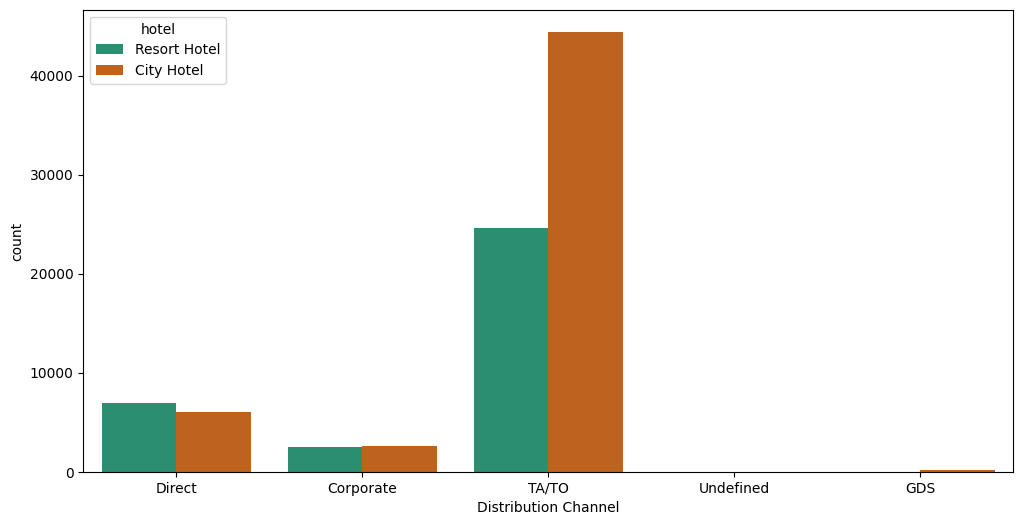

In [110]:
#Deposite type in hotel
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'distribution_channel',hue='hotel',palette='Dark2',data=df)
ax.set_xlabel('Distribution Channel')
plt.show()

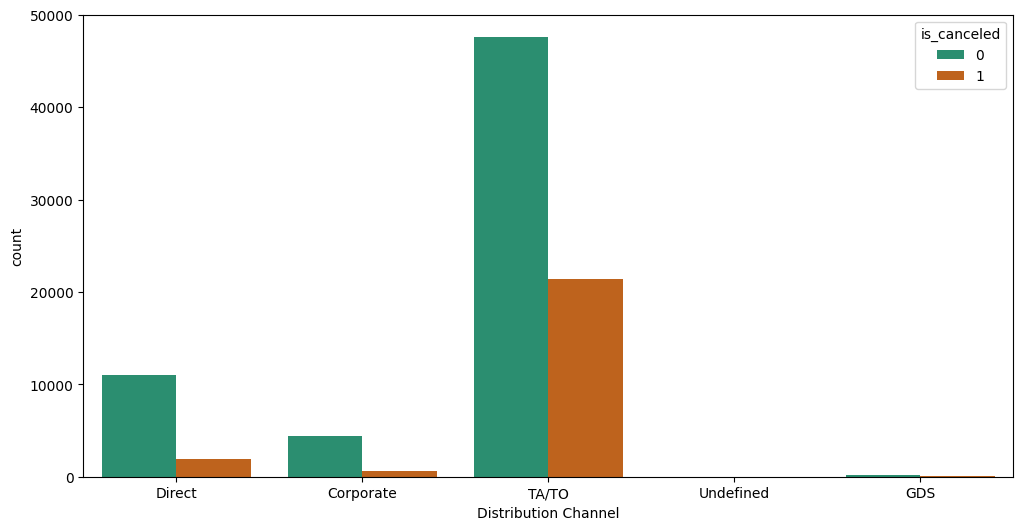

In [111]:
#Deposite type cancellations
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'distribution_channel',hue='is_canceled',palette='Dark2',data=df)
ax.set_xlabel('Distribution Channel')
plt.show()

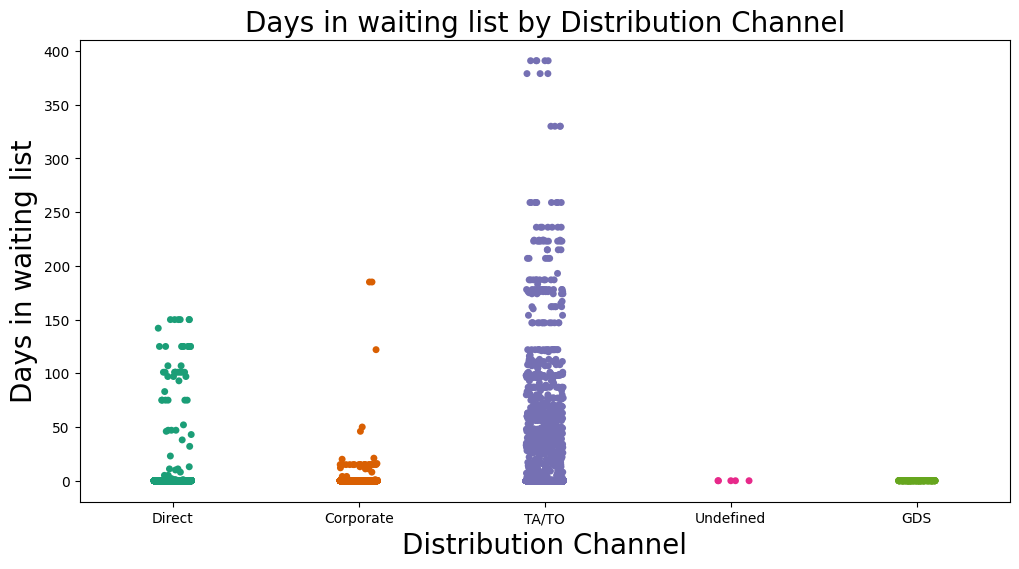

In [112]:
#days in waiting list by Distribution Channel
plt.figure(figsize = (12,6))
ax = sns.stripplot(x = 'distribution_channel', y = 'days_in_waiting_list',palette='Dark2',data=df)
ax.set_xlabel('Distribution Channel', fontsize = 20)
ax.set_ylabel('Days in waiting list', fontsize = 20)
ax.set_title('Days in waiting list by Distribution Channel', fontsize = 20)
plt.show()

*   More number of bookings came from TA/TO(TA: Travel agents,TO: Tour operators)distribution channel
*   In distribution channel city hotel has high TA/TO and cancellations.
*   The high number of days on the waiting list are TA/TO.

#**Reservation Status**

In [113]:
df['reservation_status'].value_counts()

Check-Out    63221
Canceled     22995
No-Show       1013
Name: reservation_status, dtype: int64

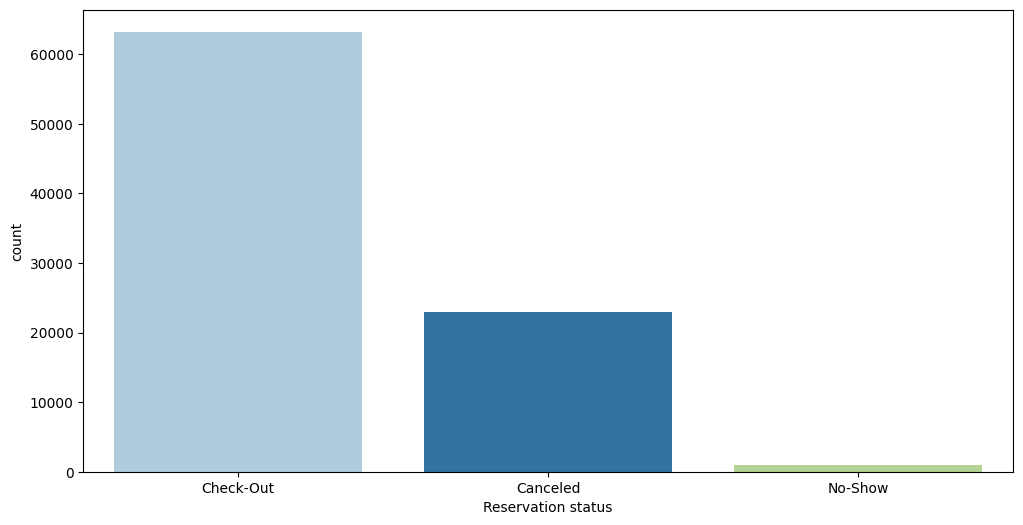

In [114]:
#Reservation status
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'reservation_status',palette='Paired',data=df)
ax.set_xlabel('Reservation status')
plt.show()

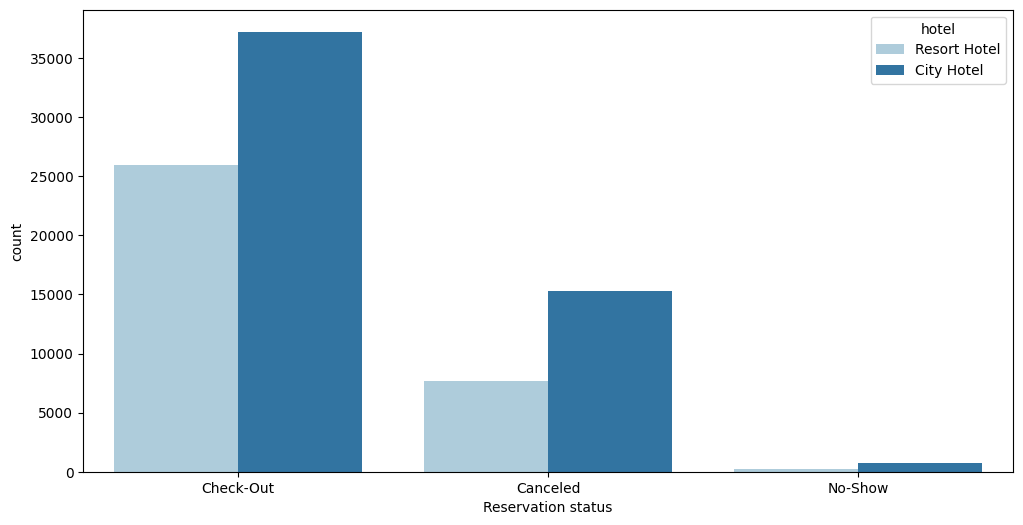

In [115]:
#Reservation status hotel
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'reservation_status',hue='hotel' ,palette='Paired',data=df)
ax.set_xlabel('Reservation status')
plt.show()

In Reservation status:
*   Check-out:75166 guests leave the hotel.
*   Canceled:43017 reservations have been cancelled.
*   No-Show:There are 1207 reservations that still need to be cancelled.
*   The City Hotel has the most check-outs followed by cancellations, and no-show reservations.

Most people checked-out which means guest left the hotel and few people are still staying in the hotel that needed to be cancelled.

#**Types of Rooms reserved**

In [116]:
df['reserved_room_type'].value_counts()

A    56435
D    17376
E     6036
F     2820
G     2050
B      996
C      914
H      596
L        6
Name: reserved_room_type, dtype: int64

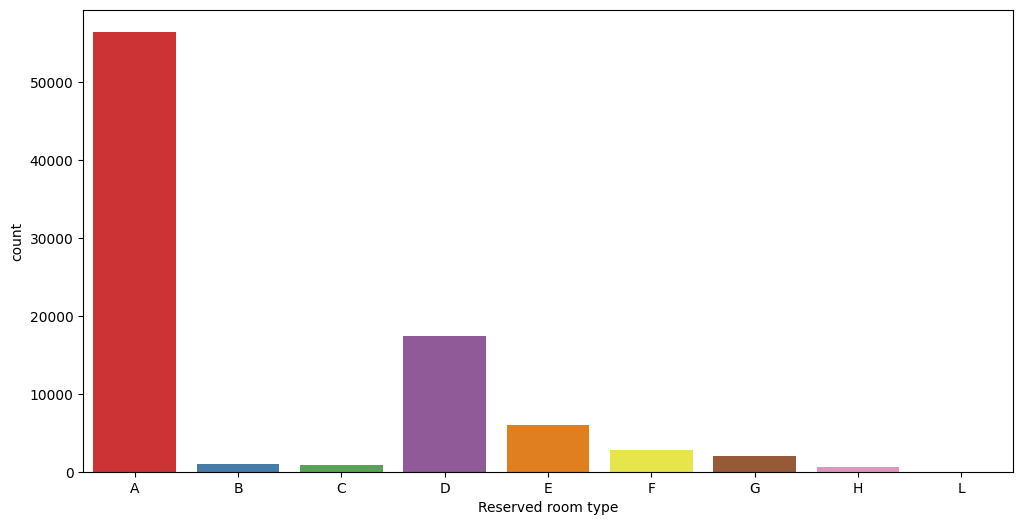

In [117]:
#Reserved room type
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'reserved_room_type',data=df,palette='Set1',order=sorted(df['reserved_room_type'].unique()))
ax.set_xlabel('Reserved room type')
plt.show()

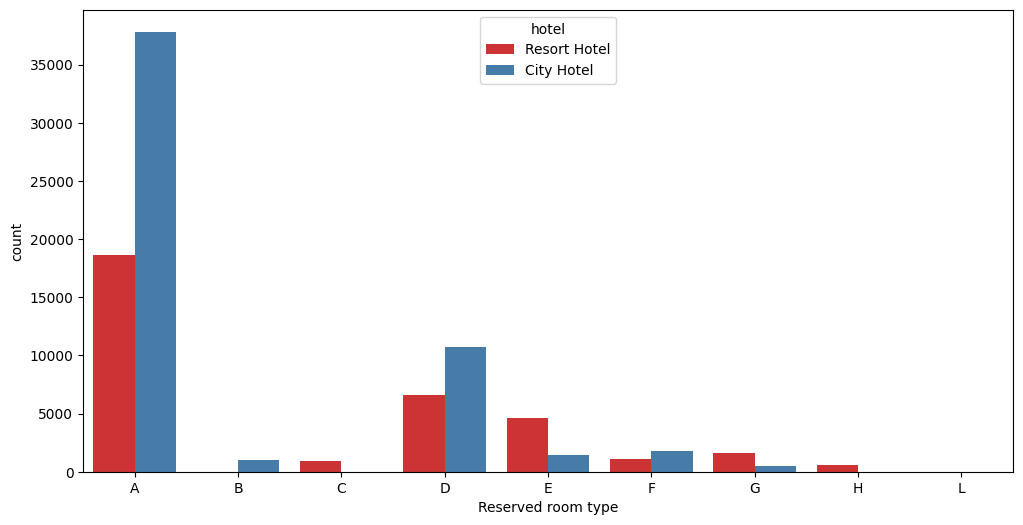

In [118]:
#Reserved room type in hotel
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'reserved_room_type',hue='hotel' ,data=df,palette='Set1',order=sorted(df['reserved_room_type'].unique()))
ax.set_xlabel('Reserved room type')
plt.show()

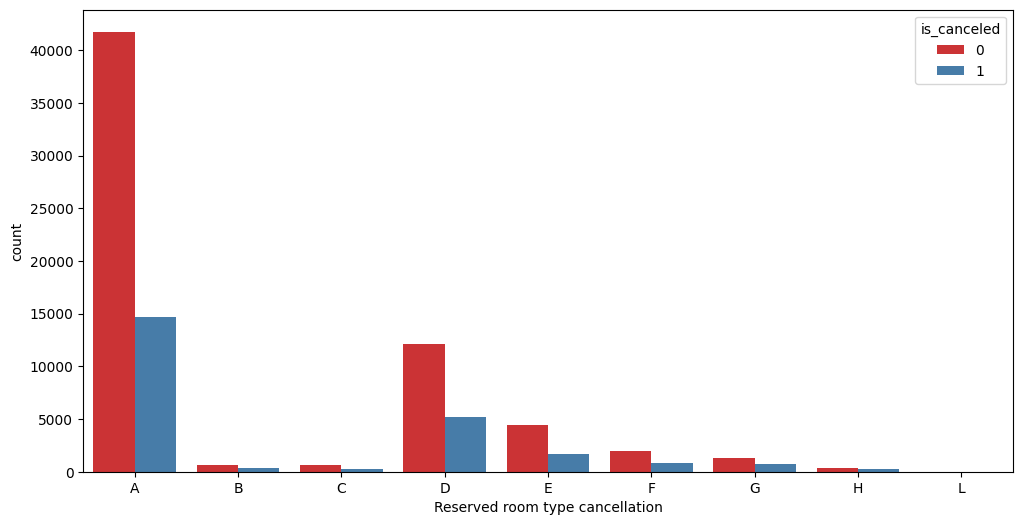

In [119]:
#Reserved room type cancellation
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'reserved_room_type',hue='is_canceled' ,data=df,palette='Set1',order=sorted(df['reserved_room_type'].unique()))
ax.set_xlabel('Reserved room type cancellation')
plt.show()

*   Highest number of rooms reserved were type A (85994), and the lowest rooms were type L (6).
*   City hotel has highest reserved room type A and type A has more cancellations in reserved room type.



#**Types of Rooms assigned**

In [120]:
df['assigned_room_type'].value_counts()

A    46282
D    22419
E     7190
F     3627
G     2495
C     2160
B     1811
H      706
I      353
K      185
L        1
Name: assigned_room_type, dtype: int64

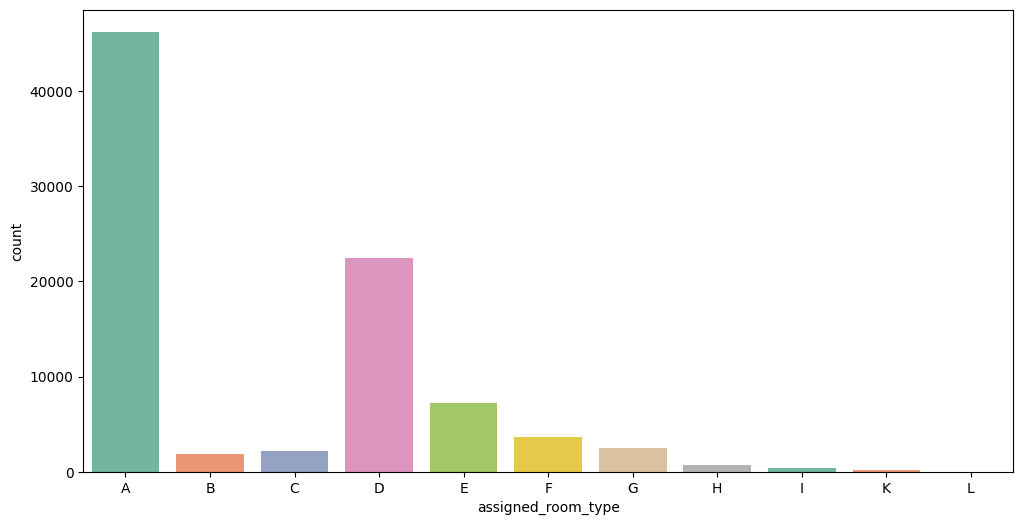

In [121]:
#assigned_room_type
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'assigned_room_type' ,data=df,palette='Set2',order=sorted(df['assigned_room_type'].unique()))
ax.set_xlabel('assigned_room_type')
plt.show()

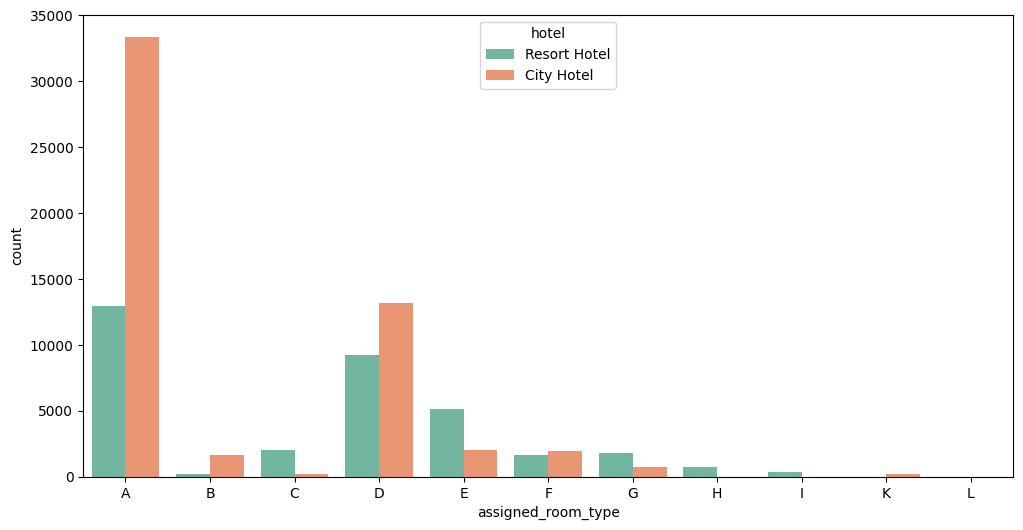

In [122]:
#assigned_room_type in hotel
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'assigned_room_type',hue='hotel' ,data=df,palette='Set2',order=sorted(df['assigned_room_type'].unique()))
ax.set_xlabel('assigned_room_type')
plt.show()

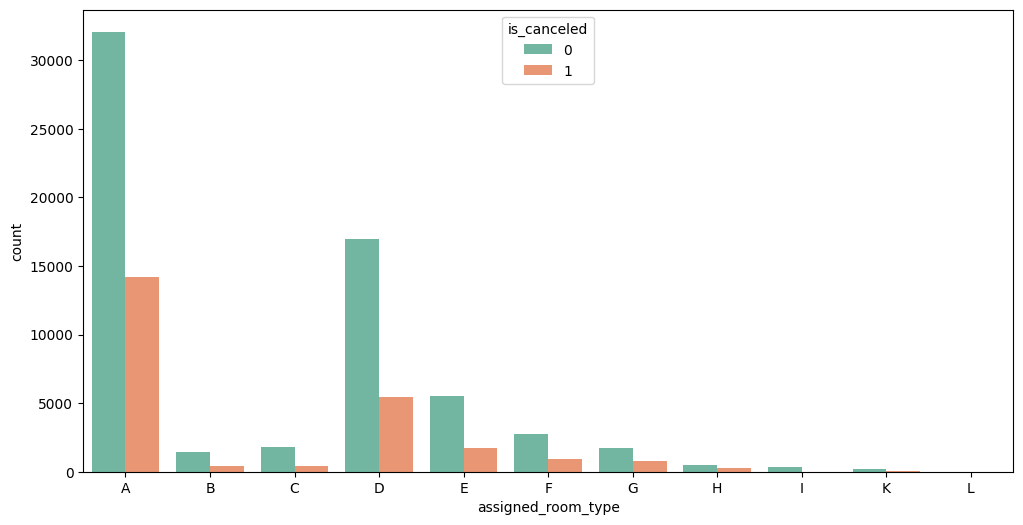

In [123]:
#assigned_room_type cancellation
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'assigned_room_type',hue='is_canceled' ,data=df,palette='Set2',order=sorted(df['assigned_room_type'].unique()))
ax.set_xlabel('assigned_room_type')
plt.show()

*   Type L had the lowest allotted room, while Type A had the highest.
*   city hotel has highest assigned room type A
*   More cancellations from type A in assigned room type.

#**Customer type**

In [124]:
df['customer_type'].value_counts()

Transient          71861
Transient-Party    11692
Contract            3135
Group                541
Name: customer_type, dtype: int64

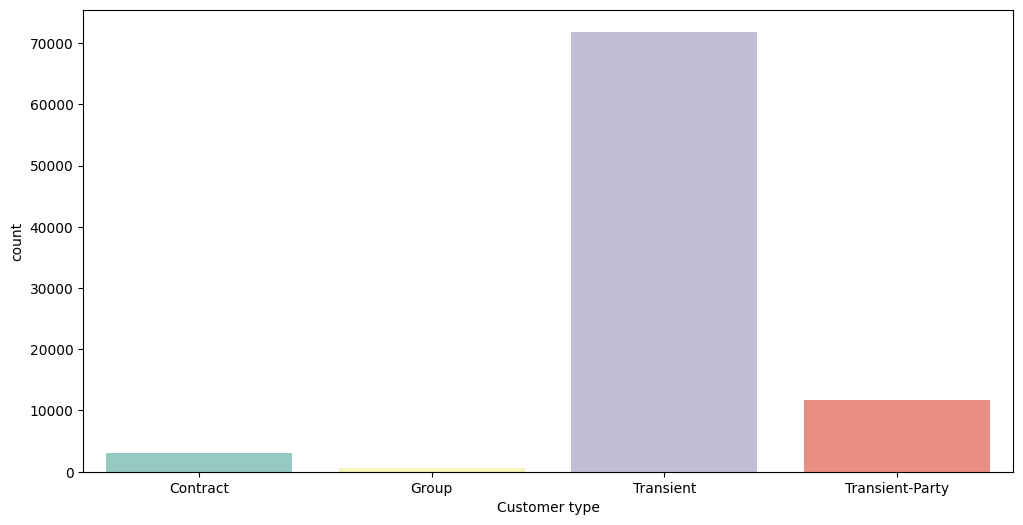

In [125]:
#Customer type
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'customer_type' ,data=df,palette='Set3',order=sorted(df['customer_type'].unique()))
ax.set_xlabel('Customer type')
plt.show()

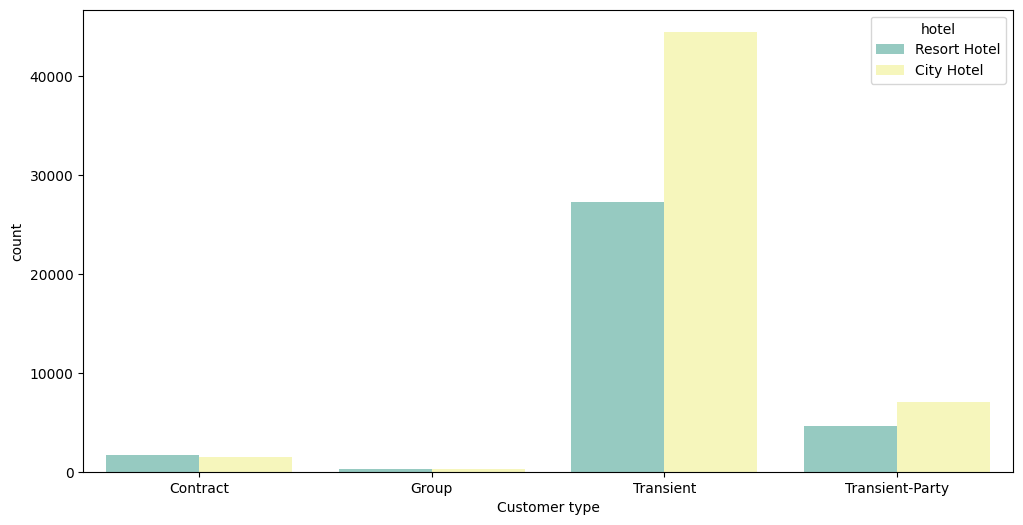

In [126]:
#Customer type in hotel
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'customer_type',hue='hotel' ,data=df,palette='Set3',order=sorted(df['customer_type'].unique()))
ax.set_xlabel('Customer type')
plt.show()

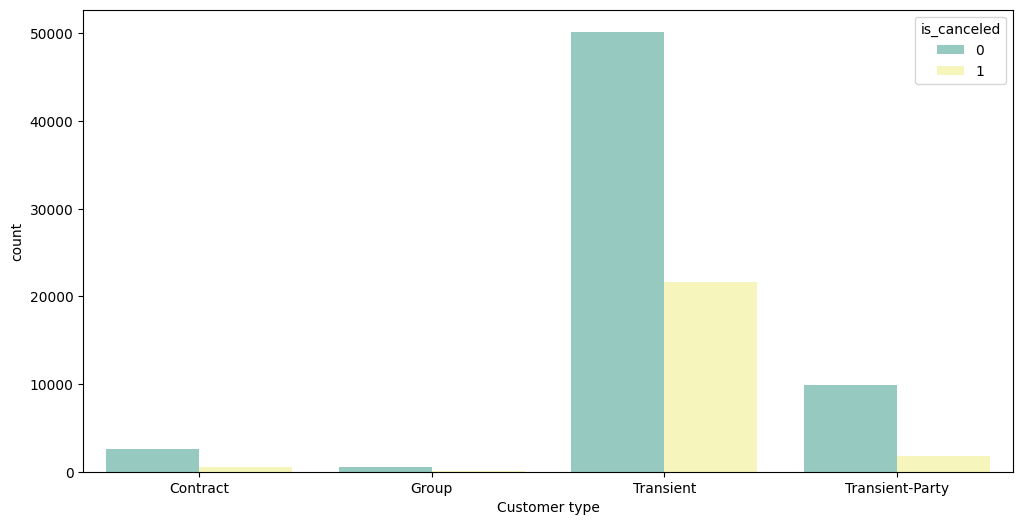

In [127]:
#Customer type cancellation
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'customer_type',hue='is_canceled' ,data=df,palette='Set3',order=sorted(df['customer_type'].unique()))
ax.set_xlabel('Customer type')
plt.show()

Customer Type:
*   Transients type booked the hotel are high for short period of time, followed by transient parties, contracts, and groups.
*   There have been more cancellations of hotels at transient than others


#**Repeated Guest**

In [128]:
df['is_repeated_guest'].value_counts()

0    83865
1     3364
Name: is_repeated_guest, dtype: int64

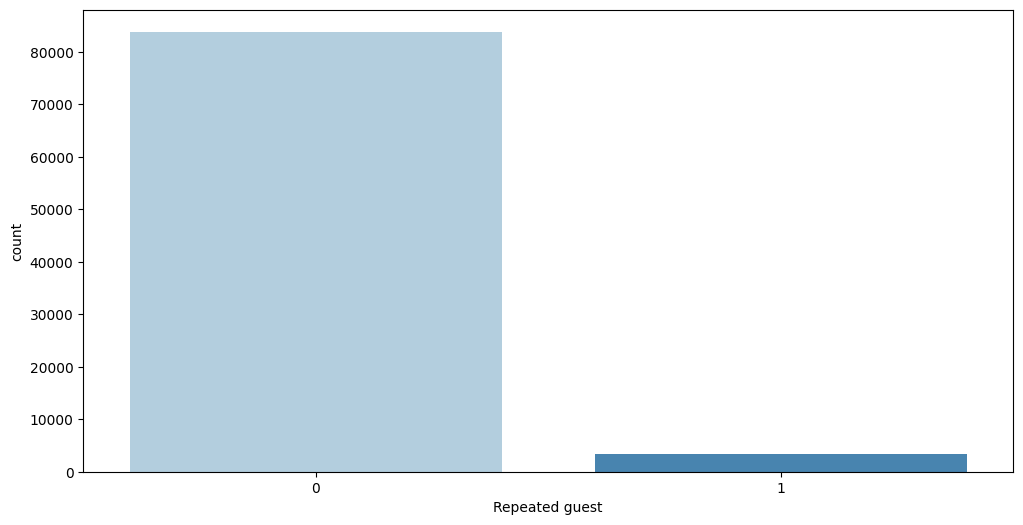

In [129]:
#Repeated guest
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'is_repeated_guest',palette='Blues',data=df)
ax.set_xlabel('Repeated guest')
plt.show()

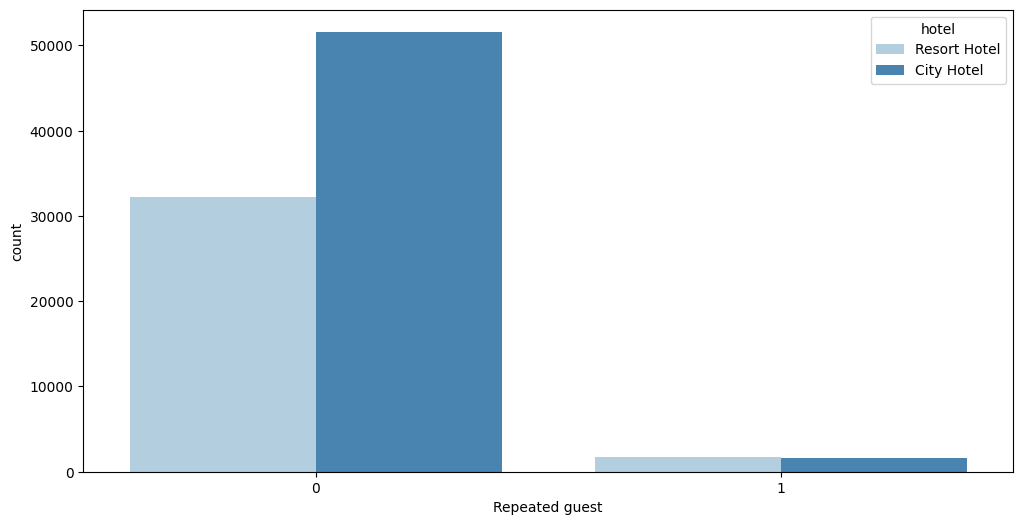

In [130]:
#Repeated guest in hotel
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'is_repeated_guest',hue='hotel',palette='Blues',data=df)
ax.set_xlabel('Repeated guest')
plt.show()

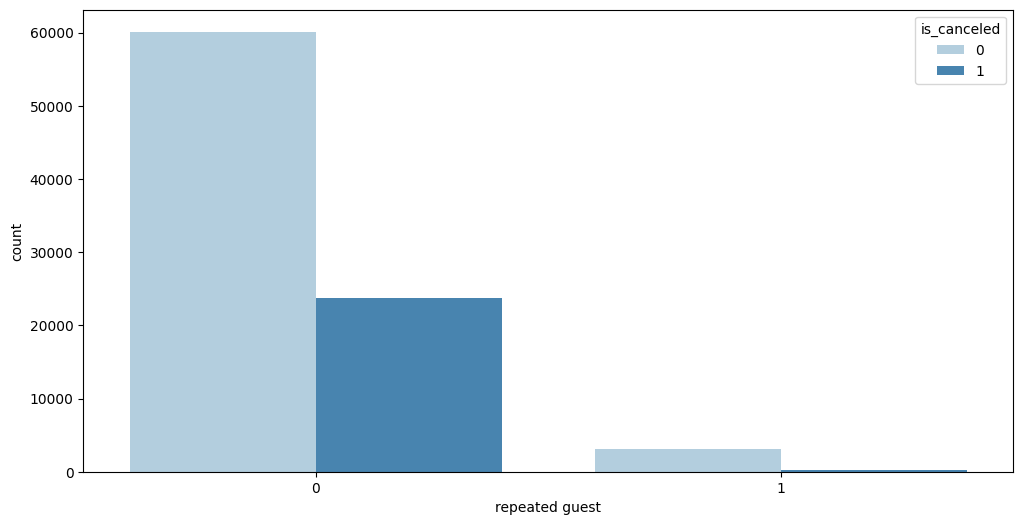

In [131]:
#Repeated guest cancellation 
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'is_repeated_guest',hue='is_canceled',palette='Blues',data=df)
ax.set_xlabel('repeated guest')
plt.show()

*   82865 guests have not been repeated while 3364 have
*   City hotels have a high percentage of one-time guests and fewer cancellations.

Repeated  guest come at hotels again because they enjoy the amenities and parks provided by hotel.

#**Special Requests**

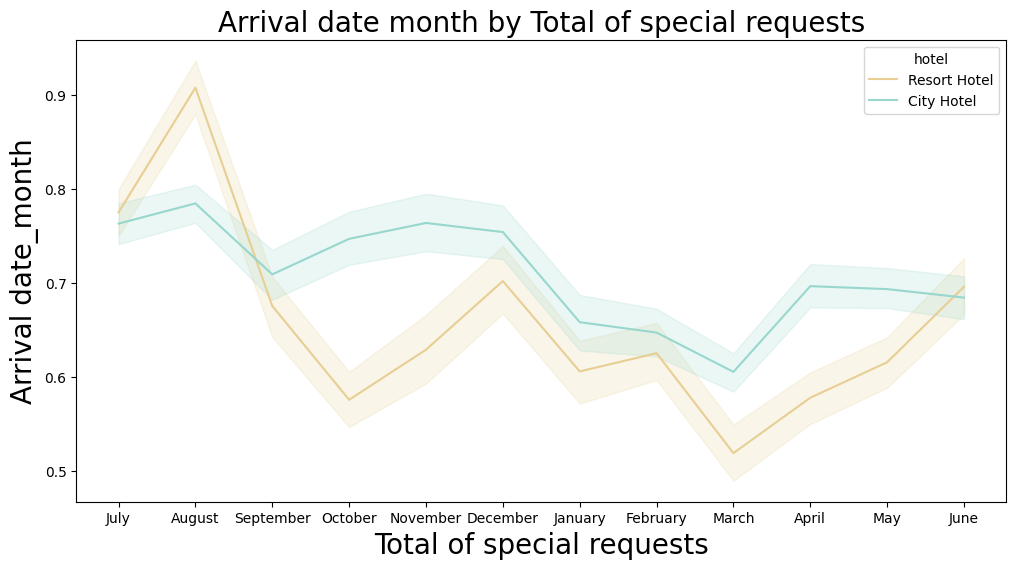

In [132]:
#Arrival date month by Total of special requests
plt.figure(figsize = (12,6))
ax = sns.lineplot(x = 'arrival_date_month', y = 'total_of_special_requests' ,hue='hotel',palette='BrBG',data=df)
ax.set_xlabel('Total of special requests', fontsize = 20)
ax.set_ylabel('Arrival date_month', fontsize = 20)
ax.set_title('Arrival date month by Total of special requests', fontsize = 20)
plt.show()

*   The above plot indicates a lot of special requests from July to August are high because of summer seasons.

#**Summary and Conclusion:**



*   **People come from all over the world to stay at a hotel so that they can tour around the place that they are staying. They do not spend their day in the hotel and they only come back to sleep and shower, maybe a meal or two. City hotels are not a destination. Resorts are located in scenic areas but not near a city or anything really. People visit a resort to get away from other people and cities. They stay in the resort and probably don’t travel around as they may do when staying at a city hotel. A resort is the destination. City hotels have the majority of bookings compared to resort hotels.**

*  **Hotels saw an increase in bookings in 2016. Compared to resort hotels, the average daily charge for hotels in cities has gone up every year. Guest visit hotels every year, May to August is the busiest booking season. From November to February, the fewest reservations are made.Average daily rates in the month of August saw the most bookings at resort hotels', while the months of November and January saw the least. From June to September, there are more overnights spent overall. As the length of the stay rises, the average daily rate decreases. This suggests that for a longer stay, a better price can be negotiated for the customer. PRT(Portugal) makes the majority of reservations.**


*   **Around 77.2% of all orders are for BB (Bed & Breakfast), which is followed by HB (Half Board), SC (no meal package), Undefined, and FB (Full Board). In the market category, many individuals used internet TA/TO(TA: Travel agents,TO: Tour operators) to make hotel reservations. The aviation waiting list has the shortest wait time. There is a demand for hotel reservations as the waiting period lengthens. The majority of hotels (104641) do not require deposits, which are followed by refundable types (14587) and non-refundable types (162), with a large percentage of city hotels accepting no deposits. There are several temporary customers who have reserved  recently. While 3364 guests have been repeated, 82865 guests have not. There are more one-time visitors and fewer cancellations in city hotels. several special requests in summer season.**
